# Exploratory data analysis (EDA) : trip statistics

# Purpose
Some statistics have been generated for each trip. This will be explored in this notebook, to find some possible patterns in the data.

# Methodology
* Load the statistics.
* Descriptive statistics.
* Make some nice seaborn plots
* Generate heat map.

# Setup

In [9]:
# %load imports.py
#%load imports.py
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
width=20
height=3
plt.rcParams["figure.figsize"] = (width,height)
sns.set(rc={'figure.figsize':(width,height)})

#import seaborn as sns
import os
from collections import OrderedDict

from IPython.display import display

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option("display.max_columns", None)

import folium
import plotly.express as px
import plotly.graph_objects as go

import sys
import os
sys.path.append('../')
from src.visualization import visualize
import scipy.integrate

sys.path.append('../../../../src/models/pipelines/longterm/scripts/prepdata/trip_statistics')
import trip_statistics


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
df_stat = trip_statistics.load_output_as_pandas_dataframe('id_statistics.parquet')

In [11]:
df_stat.shape

(180, 29)

In [12]:
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 180 entries, 3.0 to 175.0
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   latitude                 180 non-null    float64            
 1   longitude                180 non-null    float64            
 2   heading                  180 non-null    float64            
 3   power_em_thruster_1      180 non-null    float64            
 4   power_em_thruster_2      180 non-null    float64            
 5   power_em_thruster_3      180 non-null    float64            
 6   power_em_thruster_4      180 non-null    float64            
 7   power_em_thruster_total  180 non-null    float64            
 8   cog                      180 non-null    float64            
 9   sin_pm1                  180 non-null    float64            
 10  sin_pm2                  180 non-null    float64            
 11  sin_pm3                  1

In [13]:
df_stat.describe()

,latitude,longitude,heading,power_em_thruster_1,power_em_thruster_2,power_em_thruster_3,power_em_thruster_4,power_em_thruster_total,cog,sin_pm1,sin_pm2,sin_pm3,sin_pm4,cos_pm1,cos_pm2,cos_pm3,cos_pm4,power_heeling,sog,delta_1,delta_2,delta_3,delta_4,trip_no,trip_time,reversing,trip_direction
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,56.036692,12.655672,166.834102,435.739364,463.983034,430.760922,415.323653,1745.806973,164.549741,-0.006298,0.044175,-0.001661,0.014598,0.031443,0.034216,-0.000498,0.002275,1.755038,4.276562,-0.956484,0.895022,0.624534,0.369014,90.500000,568.806242,0.488889,0.501746
std,0.002222,0.005767,94.349079,72.769951,78.439446,105.279072,96.555508,325.947290,91.219760,0.152934,0.152298,0.166667,0.160679,0.715769,0.720609,0.730304,0.731486,1.647406,0.638004,1.109909,0.906514,0.832492,0.758476,52.105662,94.330628,0.501271,0.498146
min,56.032610,12.617400,58.467020,0.000000,0.000000,0.000000,0.000000,0.000000,62.470000,-0.904040,-0.912915,-0.849610,-0.870745,-0.811458,-0.813566,-0.819646,-0.819602,0.000000,0.205778,-2.784467,-1.146497,-1.014576,-1.800142,1.000000,0.000000,0.000000,0.000000
25%,56.035046,12.654345,68.537546,409.185937,436.568353,364.988166,357.229247,1579.014835,72.977811,-0.057369,-0.016772,-0.065958,-0.048872,-0.683703,-0.684568,-0.739910,-0.739536,0.137564,4.266054,-1.987694,0.084536,-0.060206,-0.131936,45.750000,549.375000,0.000000,0.000000
50%,56.036571,12.655652,250.349140,446.379809,475.821309,431.906196,418.116925,1771.064364,251.131313,-0.018309,0.039314,0.002206,0.023343,-0.042544,-0.063470,0.005247,0.049308,1.389212,4.369986,-0.388489,0.672684,0.226402,0.126660,90.500000,575.750434,0.000000,0.596493
75%,56.037677,12.657306,257.141164,479.606461,510.009239,476.821208,459.039259,1918.397678,254.530063,0.038165,0.094103,0.060839,0.062347,0.754794,0.762207,0.736016,0.739198,2.927588,4.478323,0.032062,1.729706,1.495127,1.015423,135.250000,609.692623,1.000000,1.000000
max,56.043600,12.691100,265.882645,593.932859,634.737538,734.320000,696.483200,2482.384000,266.030000,0.970730,0.977910,1.000000,0.998050,0.823065,0.827937,0.814539,0.819207,7.037406,4.930513,2.197738,2.478139,2.081226,1.948837,180.000000,745.000000,1.000000,1.000000


In [14]:
df_stat.head()

,latitude,longitude,heading,power_em_thruster_1,power_em_thruster_2,power_em_thruster_3,power_em_thruster_4,power_em_thruster_total,cog,sin_pm1,sin_pm2,sin_pm3,sin_pm4,cos_pm1,cos_pm2,cos_pm3,cos_pm4,power_heeling,sog,delta_1,delta_2,delta_3,delta_4,trip_no,trip_time,reversing,trip_direction,start_time,end_time
trip_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3.0,56.037121,12.657407,66.003030,384.353535,403.802571,356.265381,348.166208,1492.587695,72.778990,0.006538,0.041393,-0.123441,-0.077197,-0.711043,-0.712979,-0.758449,-0.755415,2.035813,4.428171,0.139468,0.170051,-0.223215,-0.189404,3.0,544.000918,0.0,0.0,2020-01-01 09:31:04+00:00,2020-01-01 09:49:13+00:00
5.0,56.037667,12.658731,66.705934,408.187609,436.029668,358.720768,348.050611,1550.988656,72.043185,0.009410,0.043116,-0.013878,0.039514,-0.657692,-0.658992,-0.696761,-0.695680,5.315009,4.270926,0.108890,0.160508,0.045390,0.016251,5.0,572.500000,0.0,0.0,2020-01-01 10:31:47+00:00,2020-01-01 10:50:52+00:00
10.0,56.035085,12.653924,259.800967,480.036907,510.279438,501.637083,473.816344,1965.769772,254.918330,0.055449,0.152862,0.099324,0.088388,0.771472,0.780358,0.713399,0.717055,1.521968,4.374468,-1.598657,2.316994,1.885320,1.212720,10.0,568.500000,1.0,1.0,2020-01-01 13:01:13+00:00,2020-01-01 13:20:10+00:00
15.0,56.036816,12.656966,66.760370,395.350926,417.489815,373.098148,371.552778,1557.491667,73.650981,-0.029059,0.000641,-0.110686,-0.053767,-0.740453,-0.743191,-0.761008,-0.758853,0.138889,4.503771,-0.176034,-0.133500,-0.202908,-0.273004,15.0,539.500000,0.0,0.0,2020-01-01 15:32:46+00:00,2020-01-01 15:50:45+00:00
19.0,56.037421,12.656943,67.862407,444.539815,476.281481,414.644444,405.754630,1741.220370,72.709019,-0.020574,0.010590,-0.239037,-0.178825,-0.638910,-0.642411,-0.762249,-0.757678,4.821296,4.524063,0.201561,0.248450,-0.360110,-0.301560,19.0,539.519444,0.0,0.0,2020-01-01 17:31:56+00:00,2020-01-01 17:49:58+00:00


## Time and direction matter

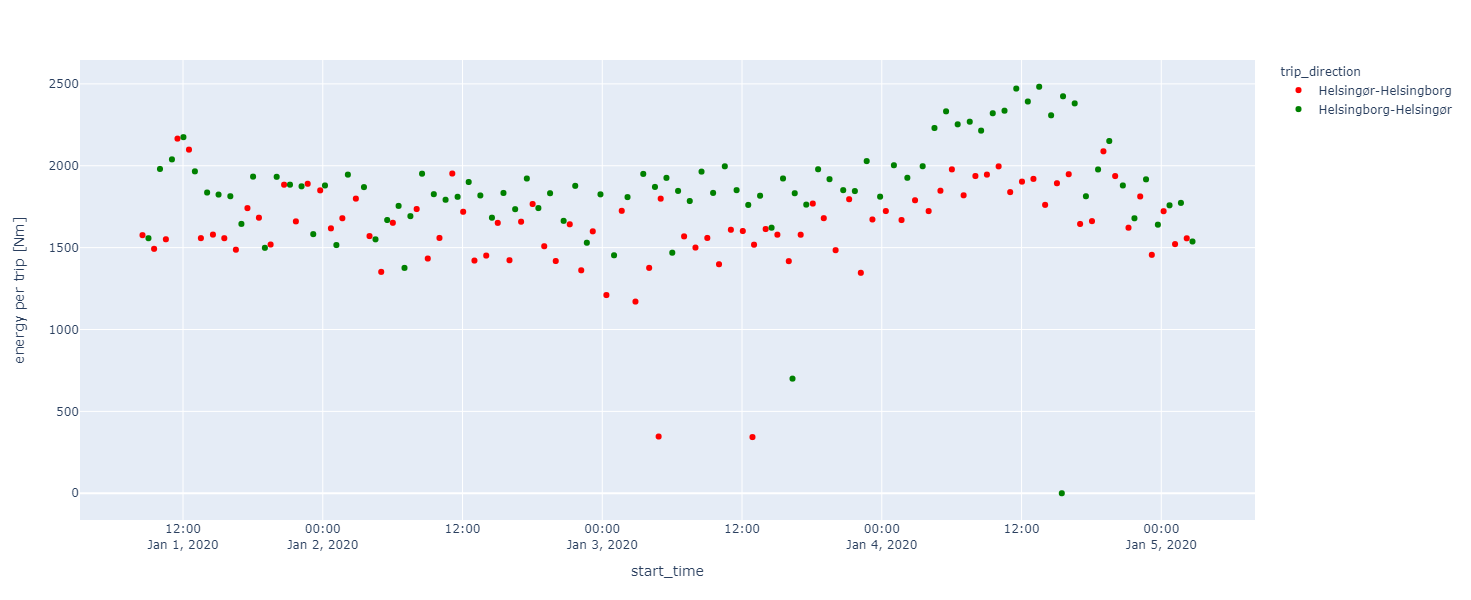

In [15]:
df_stat_plot = df_stat.copy()

df_stat_plot['energy per trip [Nm]'] = df_stat_plot['power_em_thruster_total']

df_stat_plot['trip_direction'] = df_stat_plot['trip_direction'].apply(lambda x : 'Helsingør-Helsingborg' if x==0 else 'Helsingborg-Helsingør')

fig = px.scatter(df_stat_plot, x='start_time',y='energy per trip [Nm]', color='trip_direction', width=1500, height=600, 
                color_discrete_sequence=['red','green'])
fig.show()

The analysis will begin looking at *Helsingør-Helsingborg* : ```trip_direction=0```

## Heat map

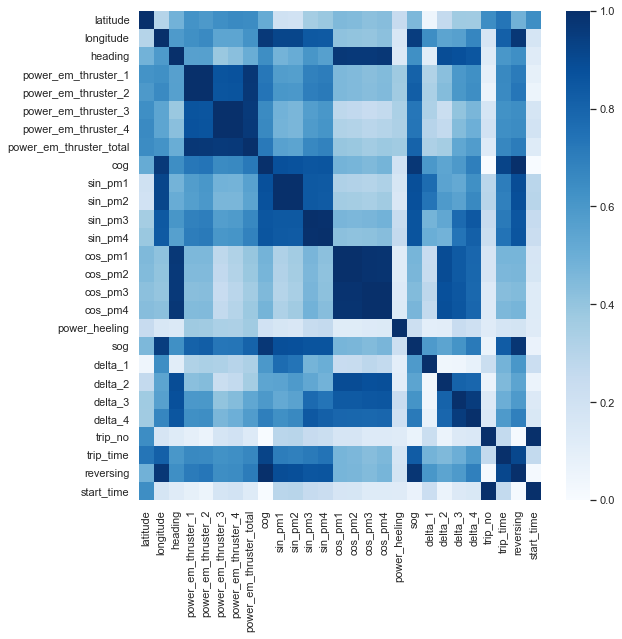

In [16]:
df = df_stat.groupby(by='trip_direction').get_group(0).copy()
df.drop(columns=['end_time','trip_direction'], inplace=True)
df['start_time'] = pd.TimedeltaIndex(df['start_time'] - df.iloc[0]['start_time']).total_seconds()

corr = df.corr().abs()

ax = sns.heatmap(corr, vmin=0, vmax=1, yticklabels=corr.index, cmap='Blues')
fig = ax.get_figure()
fig.set_size_inches(9,9)

In [17]:
corr_power = corr.loc['power_em_thruster_total'].sort_values(ascending=False).iloc[1:].copy()
corr_power

power_em_thruster_1    0.970141
power_em_thruster_2    0.966343
power_em_thruster_4    0.962951
power_em_thruster_3    0.959447
sog                    0.802836
cog                    0.720191
reversing              0.707526
sin_pm4                0.685577
trip_time              0.666311
sin_pm3                0.663813
latitude               0.646014
longitude              0.617337
delta_4                0.580590
sin_pm1                0.556921
sin_pm2                0.545052
delta_3                0.532990
heading                0.504983
cos_pm1                0.393043
cos_pm2                0.384893
cos_pm4                0.380550
power_heeling          0.363864
cos_pm3                0.363263
delta_2                0.355262
delta_1                0.331853
trip_no                0.131807
start_time             0.128673
Name: power_em_thruster_total, dtype: float64

In [18]:
mask = corr_power > 0.4
corr_power_important = corr_power[mask].copy()
corr_power_important

power_em_thruster_1    0.970141
power_em_thruster_2    0.966343
power_em_thruster_4    0.962951
power_em_thruster_3    0.959447
sog                    0.802836
cog                    0.720191
reversing              0.707526
sin_pm4                0.685577
trip_time              0.666311
sin_pm3                0.663813
latitude               0.646014
longitude              0.617337
delta_4                0.580590
sin_pm1                0.556921
sin_pm2                0.545052
delta_3                0.532990
heading                0.504983
Name: power_em_thruster_total, dtype: float64

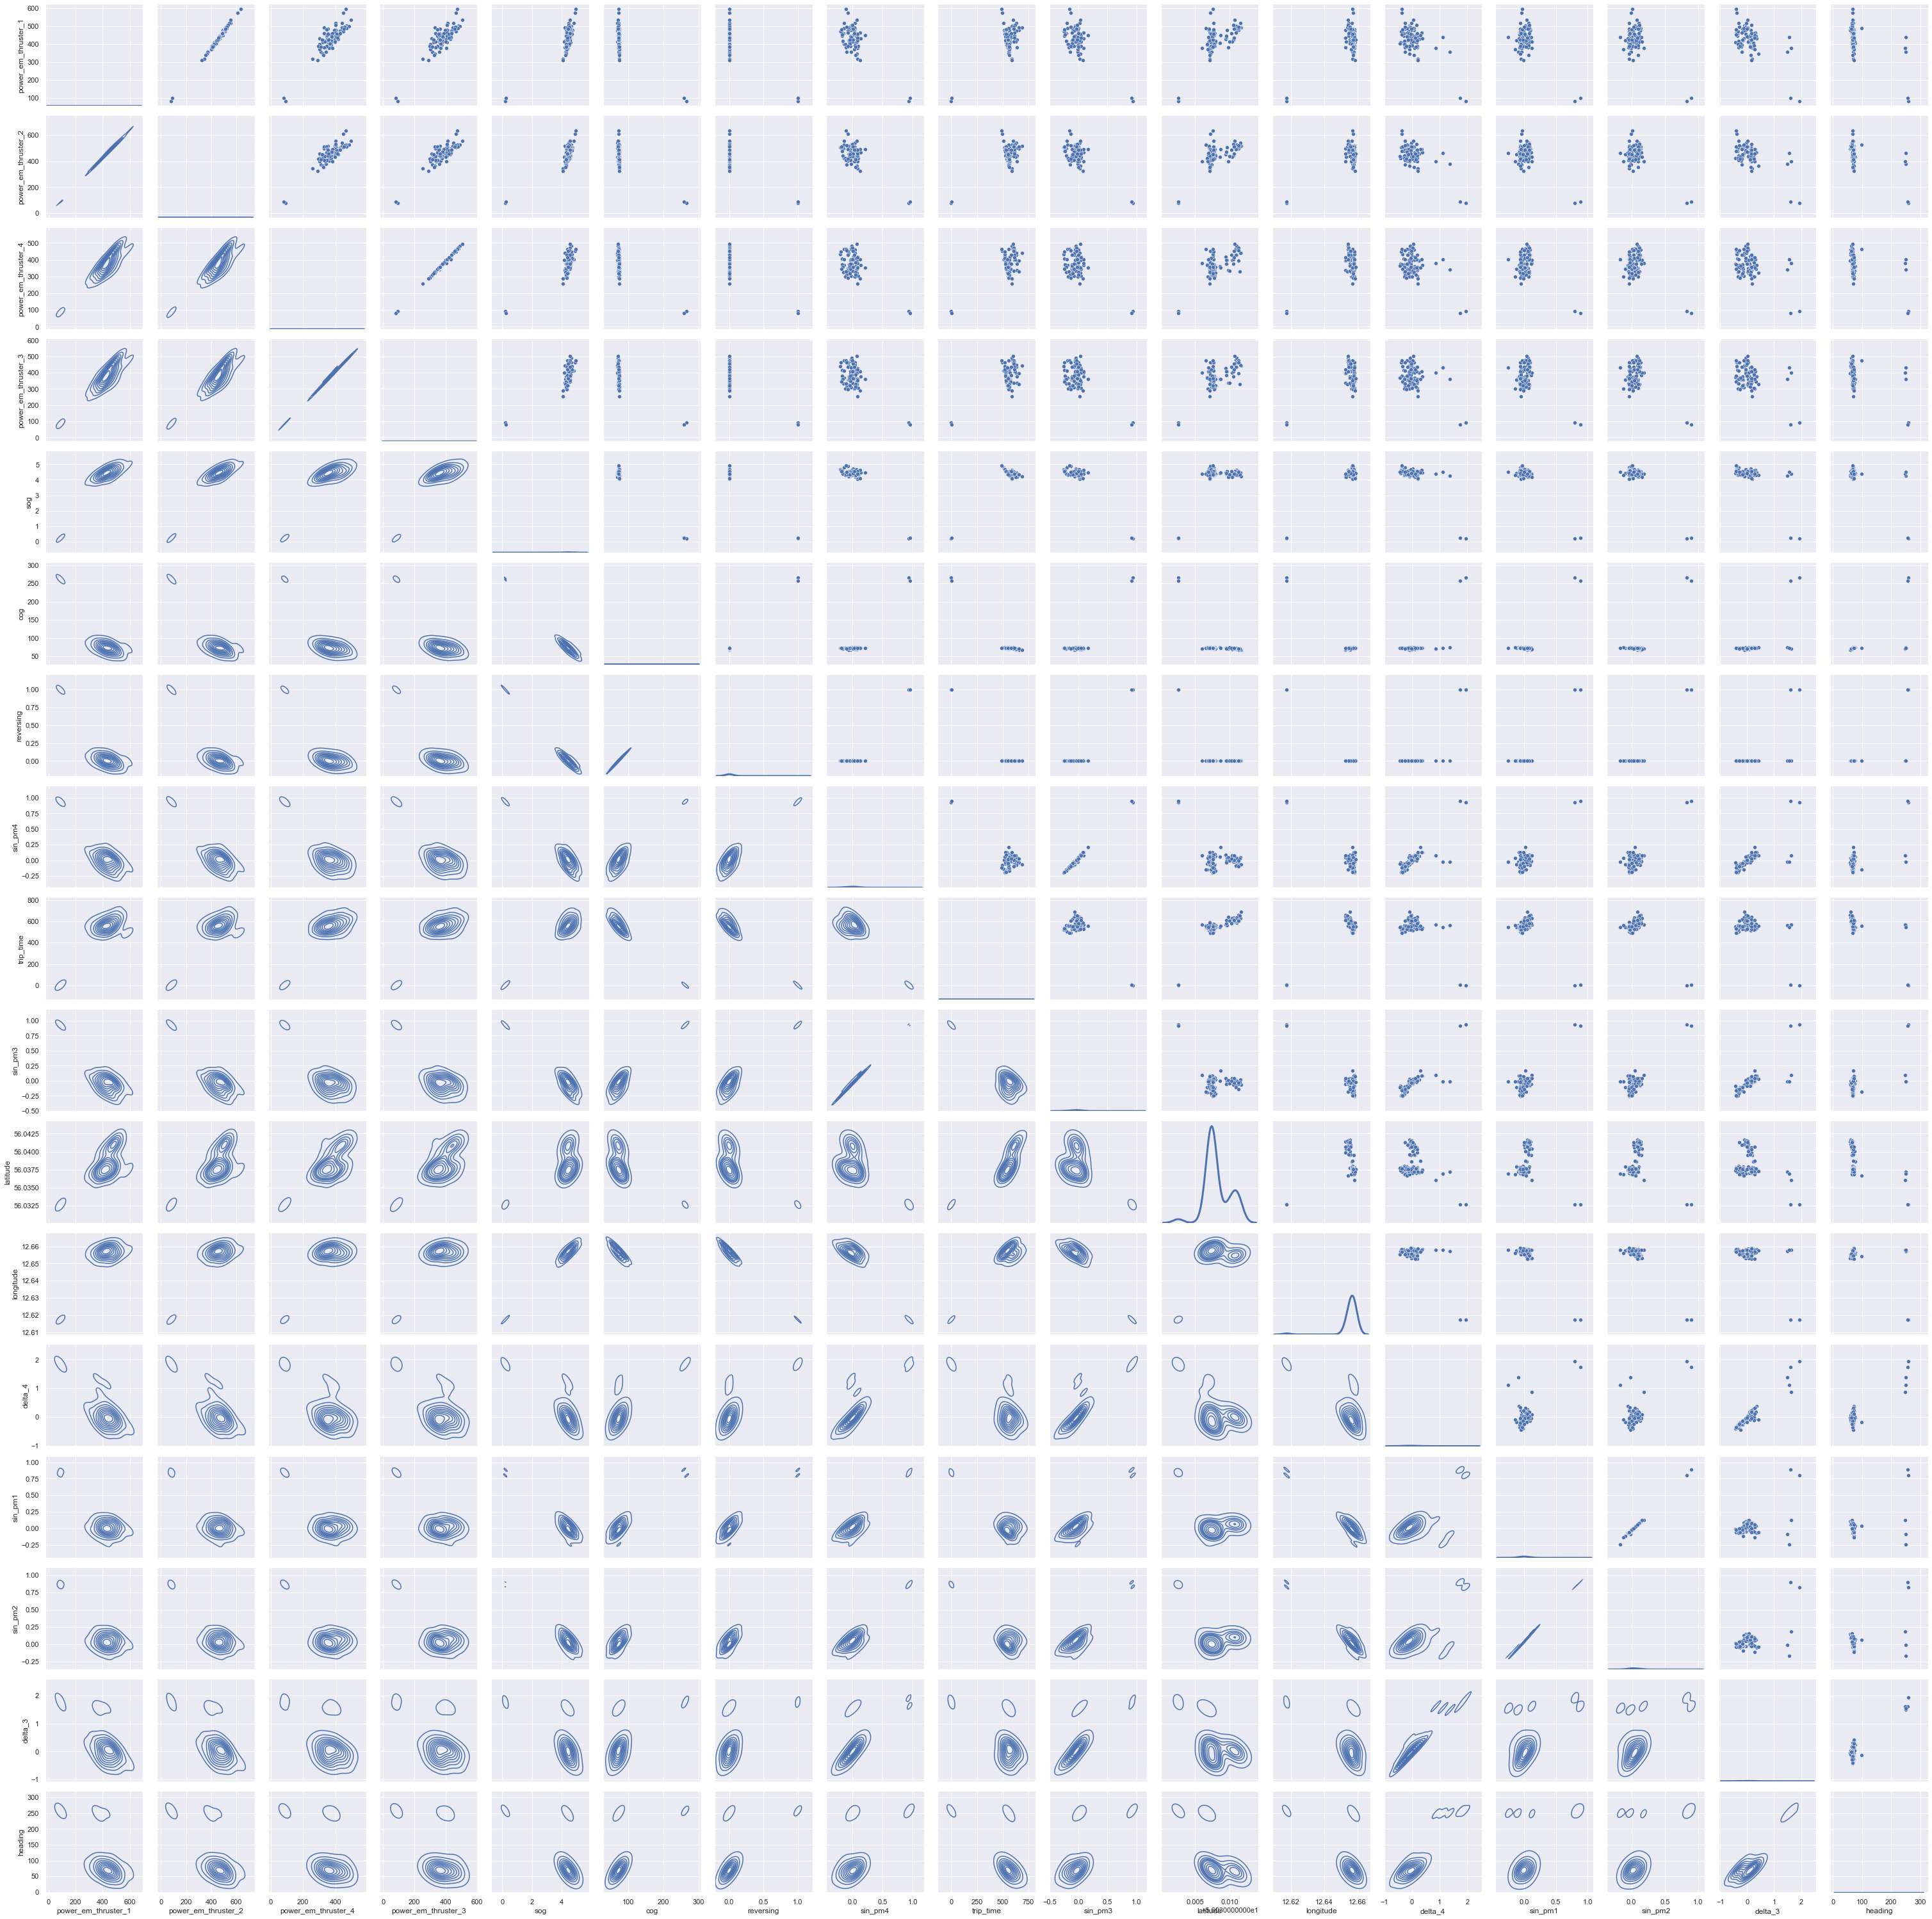

In [19]:
g = sns.PairGrid(df[corr_power_important.index])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)